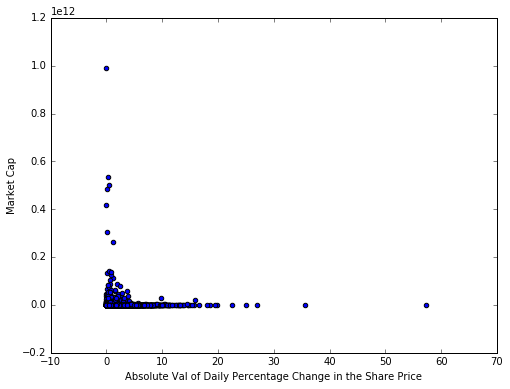

Number of price change observations: 2666
Number of market cap observations: 2666


In [26]:
"""""
Ildebrando Magnani

im975

Homework #3

This program starts by reading in the file 'company_list_corrected.csv'. From the file, it extracts companies' 
ticker symbols and market caps (it also performs some necessary data cleaning along the way), and obtains the 
daily percent change in the share price of each company by sending a live request to Yahoo Finance. As a result, 
it plots companies' market caps on the absolute values of the daily percent changes. According to this measure, 
lower cap stocks seem to be more volatile.

The program works but it could be faster.

"""""


%matplotlib inline

import matplotlib.pyplot as plt
import requests
import re


# Define lists that will contain 1-raw data from .csv file (raw), 2-companies ticker symbols (sym),
# 3-market caps (mktcp), 4-YahooFin's daily volatility data (sigma).
raw = []
sym = []
mktcp = []
sigma = []

# Open and read the .csv file skipping the header line, append each line of the .csv file to a list called "raw".
data = open("company_list_corrected.csv")  
for line in data.readlines()[1:]:
    raw.append(line)

# Replace "\n" with nothing in "raw"'s entries, drop the line if it contains "N/A".   
raw = [r.replace('\n', '') for r in raw]
raw = [r for r in raw if "N/A" not in r]

# Split each element of "raw" at the comma ==> "raw" becomes a list of sublists which can either have 3 or 4 entries.
# Append all companies' symbols to a list called "sym". 
# Takes the last entry of each sublist of "raw" and append it to "mktcp".
for i in range(len(raw)):
    raw[i] = raw[i].split(',')
    sym.append(raw[i][0])
    if len(raw[i]) == 3:
        mktcp.append(raw[i][2])
    else:
        mktcp.append(raw[i][3])

# It does some cleaning by replacing any double quote (") with nothing in "sym" and "mktcp"'s strings.
sym = [s.replace('"', '') for s in sym]
mktcp = [m.replace('"', '') for m in mktcp]

# Check if mktcp value is in millions or billions and it multiplies the element by 10^6(for 'M') or 10^9 (for 'B').
# It also does a manual correction. (One of the 2666 elements of mktcp has 'Ltd.' instead of numerical cap value).
for k in range(len(mktcp)):
    if 'M' in mktcp[k]:
        mktcp[k] = re.findall('\d+\.\d+', mktcp[k])[0]
        mktcp[k] = float(mktcp[k]) * 1000000
    elif 'B' in mktcp[k]:
        mktcp[k] = re.findall('\d+\.\d+', mktcp[k])[0]
        mktcp[k] = float(mktcp[k]) * 1000000000    
    elif 'Ltd.' in mktcp[k]:
        mktcp[k] = 1000000.0
        mktcp[k] = float(mktcp[k])
        
# It groups symbolic names in "syms" by clusters of 200 to build URL.
syms = [sym[i:i+200] for i in range(0, len(sym), 200)]

# It builds 14 URLs and sends 14 requests to YahooFin. It stores the price change data appending them to list "sigma".
for i in range(len(syms)):
    syms[i] = "+".join(syms[i])
    syms[i] = 'http://finance.yahoo.com/d/quotes.csv?s=' + syms[i] + '&f=p2'
    data = requests.get(syms[i])
    sigma.append(data.text)

# It splits the elements of "sigma" at '\n' and replace double quotes (") with nothing.
for i in range(len(sigma)):
    sigma[i] = sigma[i].split('\n')
    sigma[i] = [s.replace('"', '').replace('%', '') for s in sigma[i]]

# Sigma is a list of lists. The first line of code below flattens sigma and turns it into a new plane list "sigmaflat".
# Delete any empty string from "sigmaflat".
# Turns strings into floats and takes absolute value of percent change.
sigmaflat = [val for sublist in sigma for val in sublist]
sigmaflat = [i for i in sigmaflat if i != '']
sigmaflat = [float(v) for v in sigmaflat]
abspchange = [abs(i) for i in sigmaflat]

# Plotting abspchange on mktcp.
plt.figure(figsize=(8,6))
plt.scatter(abspchange,mktcp)
plt.xlabel('Absolute Val of Daily Percentage Change in the Share Price')
plt.ylabel('Market Cap')

plt.show()

# Shows number of observations.

print('Number of price change observations:', len(abspchange))
print('Number of market cap observations:', len(mktcp))
    






    

    

    
    
        
    



